In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from fbprophet import Prophet

# Подготовка данных

In [2]:
df = pd.read_csv("data/Power-Networks-LCL-June2015(withAcornGps)v2_1.csv")

In [3]:
df.head()

LCLid stdorToU                     DateTime KWH/hh (per half hour)   \
0  MAC000002      Std  2012-10-12 00:30:00.0000000                      0    
1  MAC000002      Std  2012-10-12 01:00:00.0000000                      0    
2  MAC000002      Std  2012-10-12 01:30:00.0000000                      0    
3  MAC000002      Std  2012-10-12 02:00:00.0000000                      0    
4  MAC000002      Std  2012-10-12 02:30:00.0000000                      0    

     Acorn Acorn_grouped  
0  ACORN-A      Affluent  
1  ACORN-A      Affluent  
2  ACORN-A      Affluent  
3  ACORN-A      Affluent  
4  ACORN-A      Affluent

In [4]:
df[df.columns[3]] = df[df.columns[3]].str.strip()
df[df.columns[3]] = pd.to_numeric(df[df.columns[3]], errors='coerce')
df[df.columns[2]] = pd.to_datetime(df[df.columns[2]])

In [5]:
df = df[df.columns[2:4]].copy()
df = df.rename(columns={df.columns[0]: "ds", df.columns[1]: "y"})
df = df.interpolate()

<AxesSubplot:xlabel='ds'>

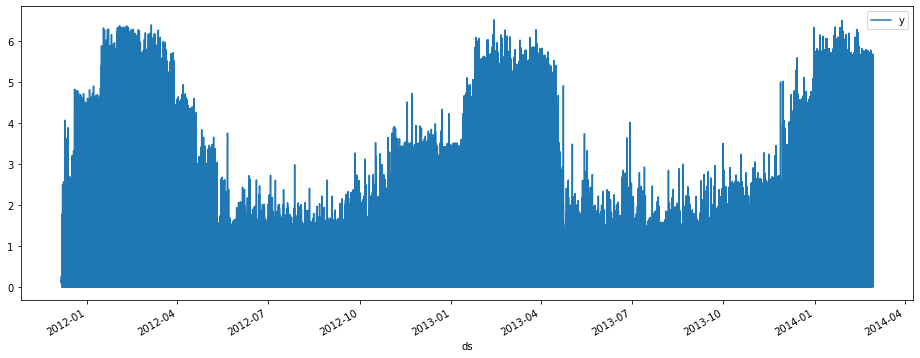

In [6]:
df.plot(x=df.columns[0], y = df.columns[1], figsize=(16,6))

# Стандартный прогноз, с автоматическим опеределением параметров

In [32]:
train_df = df[3000:6000]
m = Prophet()
m.fit(train_df)
future = m.make_future_dataframe(periods=1000, freq='30min', include_history=False)
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


RMSE:  0.43497377205483084


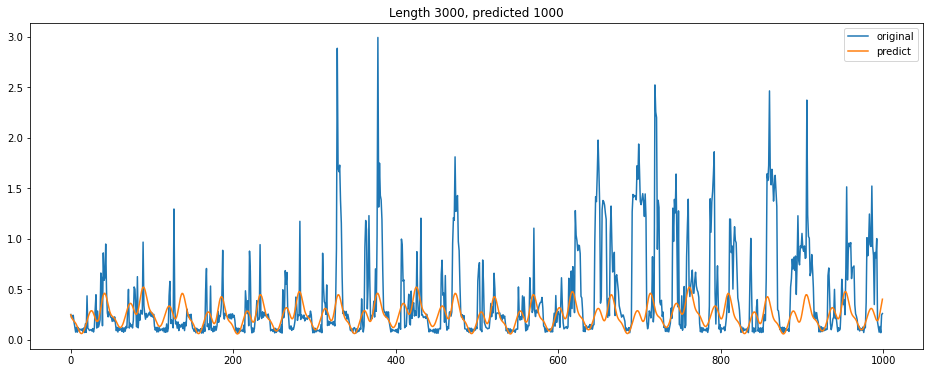

In [33]:
orig = df['y'][6000:7000].values
result = forecast['yhat'].values
print("RMSE: ", ((result - orig) ** 2).mean() ** .5)
plt.figure(figsize=(16,6))
plt.title("Length " + str(train_length) + ", predicted " + str(len(result)))
plt.plot(orig, label="original")
plt.plot(result, label="predict")
plt.legend()

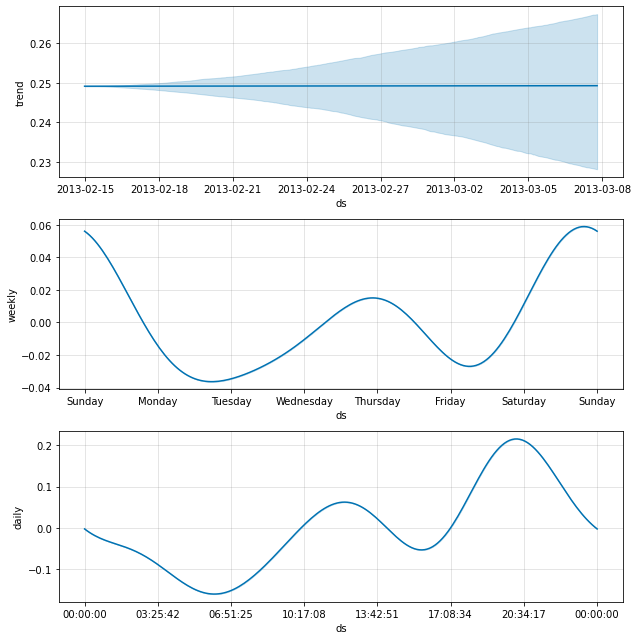

In [34]:
m.plot_components(forecast);

# Подбор окон для обучение и прогноза

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


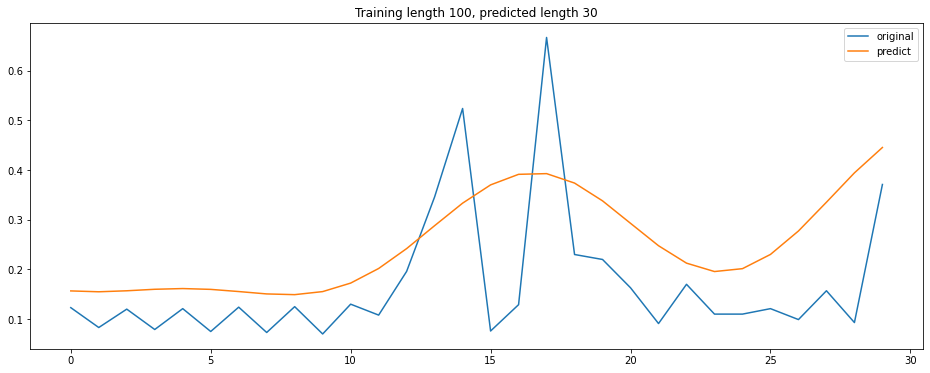

In [136]:
train_df = df[:100]
m = Prophet()
m.fit(train_df)
future = m.make_future_dataframe(periods=30, freq='30min', include_history = False)
forecast = m.predict(future)

orig = df['y'][100:130].values
result = forecast['yhat'].values

plt.figure(figsize=[16,6])
plt.title("Training length " + str(len(train_df)) + ", predicted length " + str(len(result)))
plt.plot(orig, label="original")
plt.plot(result, label="predict")
plt.legend()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


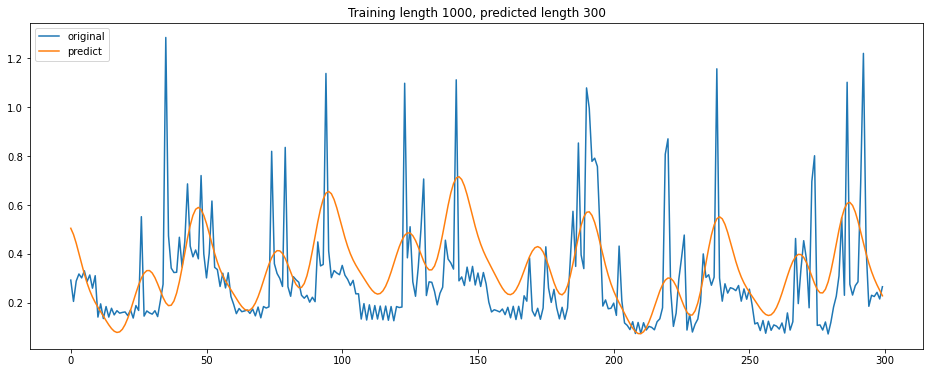

In [135]:
train_df = df[:1000]
m = Prophet()
m.fit(train_df)
future = m.make_future_dataframe(periods=300, freq='30min', include_history = False)
forecast = m.predict(future)

orig = df['y'][1000:1300].values
result = forecast['yhat'].values

plt.figure(figsize=[16,6])
plt.title("Training length " + str(len(train_df)) + ", predicted length " + str(len(result)))
plt.plot(orig, label="original")
plt.plot(result, label="predict")
plt.legend()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


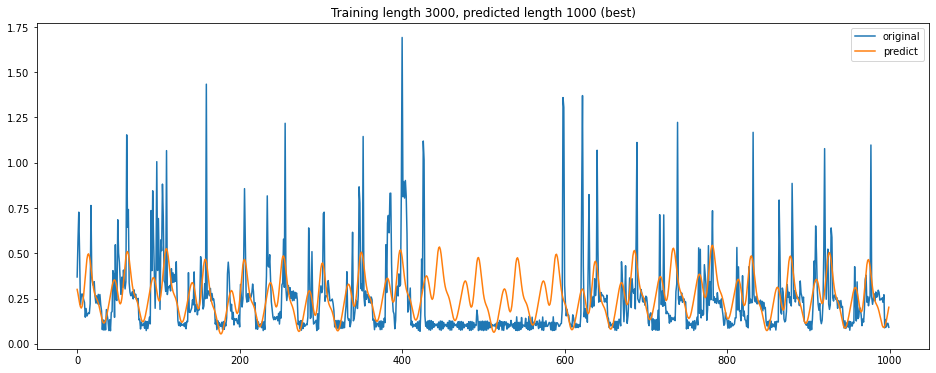

In [140]:
train_df = df[:3000]
m = Prophet()
m.fit(train_df)
future = m.make_future_dataframe(periods=1000, freq='30min', include_history = False)
forecast = m.predict(future)

orig = df['y'][3000:4000].values
result = forecast['yhat'].values

plt.figure(figsize=[16,6])
plt.title("Training length " + str(len(train_df)) + ", predicted length " + str(len(result)) + " (best)")
plt.plot(orig, label="original")
plt.plot(result, label="predict")
plt.legend()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


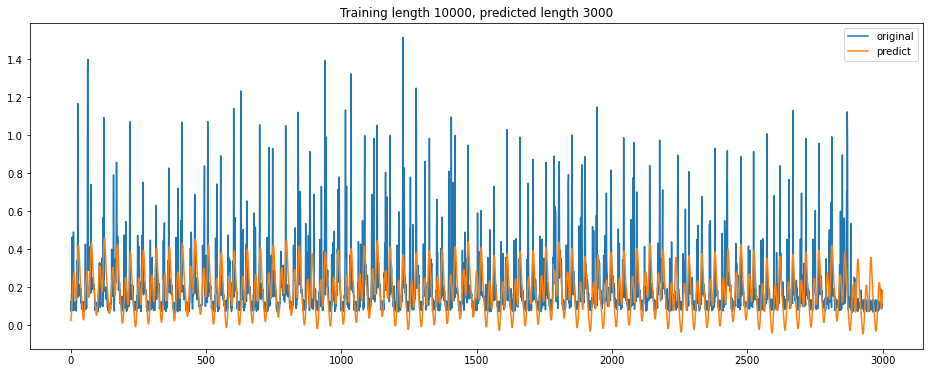

In [138]:
train_df = df[:10000]
m = Prophet()
m.fit(train_df)
future = m.make_future_dataframe(periods=3000, freq='30min', include_history = False)
forecast = m.predict(future)

orig = df['y'][10000:13000].values
result = forecast['yhat'].values

plt.figure(figsize=[16,6])
plt.title("Training length " + str(len(train_df)) + ", predicted length " + str(len(result)))
plt.plot(orig, label="original")
plt.plot(result, label="predict")
plt.legend()

# Прогноз с заданными holidays

In [121]:
holidays = pd.DataFrame({
  'holiday': 'test',
  'ds': pd.to_datetime(df['ds'].values[3000:7000][::135]),
  'lower_window': 0,
  'upper_window': 1,
})
train_df = df[3000:6000]
m = Prophet(holidays=holidays)
m.fit(train_df)
future = m.make_future_dataframe(periods=1000, freq='30min', include_history=False)
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


RMSE:  0.43513737147193543


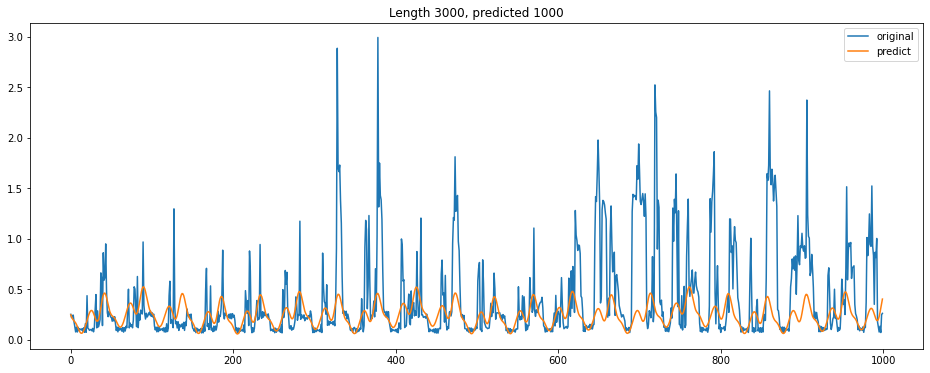

In [122]:
orig = df['y'][6000:7000].values
result = forecast['yhat'].values
print("RMSE: ", ((result - orig) ** 2).mean() ** .5)
plt.figure(figsize=(16,6))
plt.title("Length " + str(train_length) + ", predicted " + str(len(result)))
plt.plot(orig, label="original")
plt.plot(result, label="predict")
plt.legend()

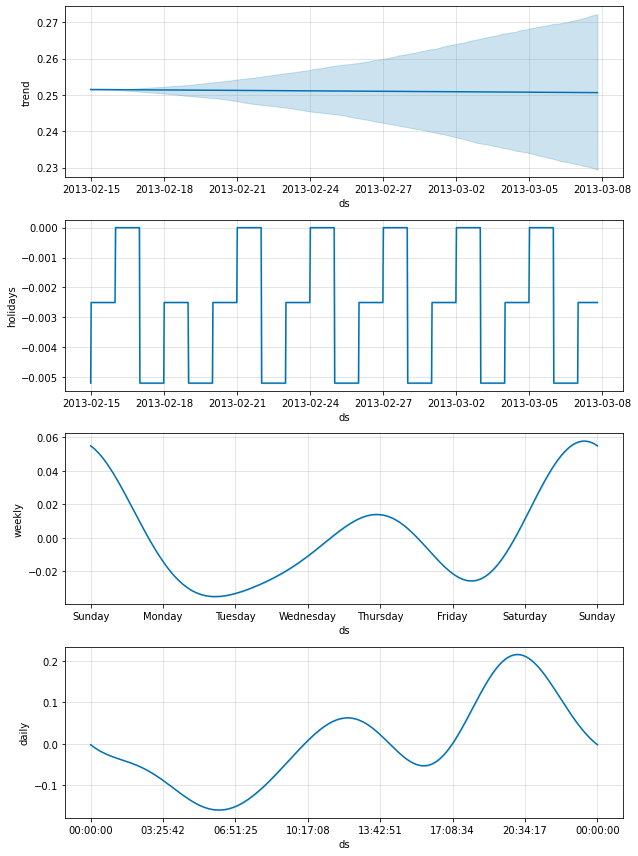

In [123]:
m.plot_components(forecast);

# Прогноз с заданными сезонностями

In [59]:
train_df = df[3000:6000]
m = Prophet()
m.add_seasonality('s1', period=1, fourier_order=18)
m.add_seasonality('s2', period=2, fourier_order=18)
m.add_seasonality('s3', period=3, fourier_order=18)
m.add_seasonality('s4', period=4, fourier_order=18)
m.fit(train_df)
future = m.make_future_dataframe(periods=1000, freq='30min', include_history = False)
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


RMSE:  0.440515950485539


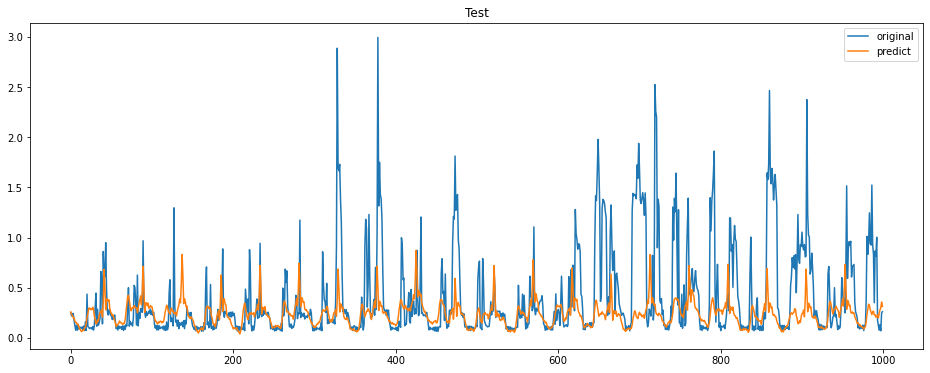

In [60]:
plt.figure(figsize=(16,6))
plt.title("Test")
plt.plot(df['y'][6000:7000].values, label="original")
plt.plot(forecast['yhat'].values, label="predict")
plt.legend()
print("RMSE: ", ((forecast['yhat'] - df['y'][6000:7000].values) ** 2).mean() ** .5)

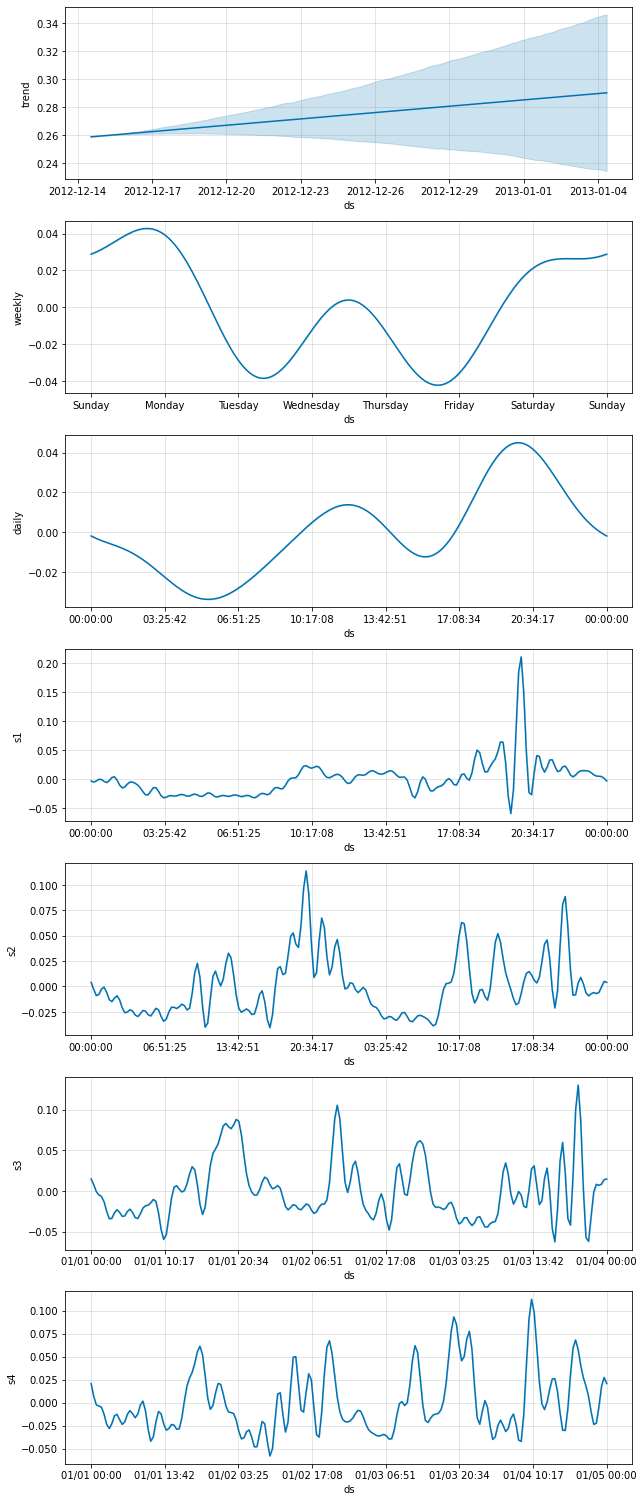

In [115]:
m.plot_components(forecast);

# Подбор параметров

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_absolute_error
from tslearn.metrics import dtw
params_grid = {'period':list(range(1, 50)),
               'fourier_order':list(range(1, 20)),
#                 'seasonalitys_quantity':list(range(1,5)) # Очень долго считает, опытным путем получилось 4))
              }
RMSE_scores = []
MAE_scores = []
DTW_scores = []
train_df = df[3000:6000]
grid = ParameterGrid(params_grid)
print([p for p in grid])
for p in grid:
    m =Prophet()
    for i in range(p['seasonalitys_quantity']):
        m.add_seasonality('s'+str(i), period=p['period'], fourier_order=p['fourier_order'])
    m.fit(train_df)
    future = m.make_future_dataframe(periods=1000, freq='30min', include_history = False)
    forecast = m.predict(future)
    RMSE = ((forecast['yhat'] - df['y'][6000:7000].values) ** 2).mean() ** .5
    MAE = mean_absolute_error(forecast['yhat'], df['y'][6000:7000].values)
    DTW = dtw(forecast['yhat'], df['y'][6000:7000].values)
    RMSE_scores.append([RMSE,p])
    MAE_scores.append([MAE,p])
    DTW_scores.append([DTW,p])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


[{'fourier_order': 1, 'period': 1, 'seasonalitys_quantity': 1}, {'fourier_order': 1, 'period': 1, 'seasonalitys_quantity': 2}, {'fourier_order': 1, 'period': 1, 'seasonalitys_quantity': 3}, {'fourier_order': 1, 'period': 1, 'seasonalitys_quantity': 4}, {'fourier_order': 1, 'period': 2, 'seasonalitys_quantity': 1}, {'fourier_order': 1, 'period': 2, 'seasonalitys_quantity': 2}, {'fourier_order': 1, 'period': 2, 'seasonalitys_quantity': 3}, {'fourier_order': 1, 'period': 2, 'seasonalitys_quantity': 4}, {'fourier_order': 1, 'period': 3, 'seasonalitys_quantity': 1}, {'fourier_order': 1, 'period': 3, 'seasonalitys_quantity': 2}, {'fourier_order': 1, 'period': 3, 'seasonalitys_quantity': 3}, {'fourier_order': 1, 'period': 3, 'seasonalitys_quantity': 4}, {'fourier_order': 1, 'period': 4, 'seasonalitys_quantity': 1}, {'fourier_order': 1, 'period': 4, 'seasonalitys_quantity': 2}, {'fourier_order': 1, 'period': 4, 'seasonalitys_quantity': 3}, {'fourier_order': 1, 'period': 4, 'seasonalitys_quanti

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with ye

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with ye

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with ye

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with ye

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with ye

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with ye

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with ye

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with ye

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with ye

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with ye

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with ye

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with ye

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with ye

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with ye

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with ye

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with ye

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with ye

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with ye

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with ye

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with ye

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with ye

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with ye

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with ye

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with ye

In [55]:
min(RMSE_scores, key=lambda x: x[0])

[0.40386334239455907, {'fourier_order': 18, 'period': 45}]

In [56]:
min(MAE_scores, key=lambda x: x[0])

[0.24010839467510123, {'fourier_order': 5, 'period': 43}]

In [57]:
max(DTW_scores, key=lambda x: x[0])

[12.138323875813894, {'fourier_order': 2, 'period': 28}]

### Прогноз с подобранным RMSE

In [61]:
train_df = df[3000:6000]
m = Prophet()
m.add_seasonality('s1', period=45, fourier_order=18)
m.fit(train_df)
future = m.make_future_dataframe(periods=1000, freq='30min', include_history = False)
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


RMSE:  0.4038639167153684


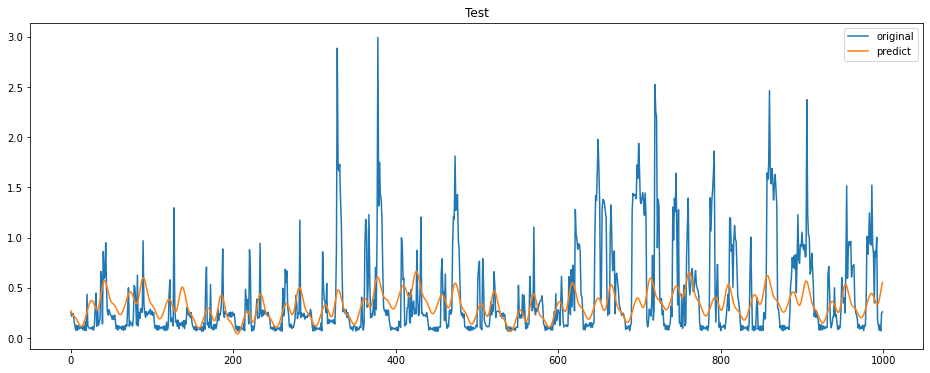

In [62]:
plt.figure(figsize=(16,6))
plt.title("Test")
plt.plot(df['y'][6000:7000].values, label="original")
plt.plot(forecast['yhat'].values, label="predict")
plt.legend()
print("RMSE: ", ((forecast['yhat'] - df['y'][6000:7000].values) ** 2).mean() ** .5)

### Прогноз с подобранным MAE

In [63]:
train_df = df[3000:6000]
m = Prophet()
m.add_seasonality('s1', period=43, fourier_order=5)
m.fit(train_df)
future = m.make_future_dataframe(periods=1000, freq='30min', include_history = False)
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


RMSE:  0.44457895150613813


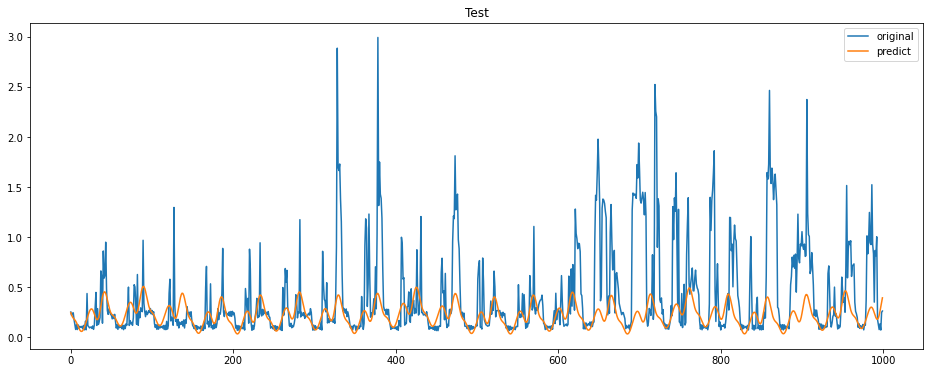

In [65]:
plt.figure(figsize=(16,6))
plt.title("Test")
plt.plot(df['y'][6000:7000].values, label="original")
plt.plot(forecast['yhat'].values, label="predict")
plt.legend()
print("RMSE: ", ((forecast['yhat'] - df['y'][6000:7000].values) ** 2).mean() ** .5)

### Прогноз с подобранным DTW

In [64]:
train_df = df[3000:6000]
m = Prophet()
m.add_seasonality('s1', period=28, fourier_order=2)
m.fit(train_df)
future = m.make_future_dataframe(periods=1000, freq='30min', include_history = False)
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


RMSE:  0.44457895150613813


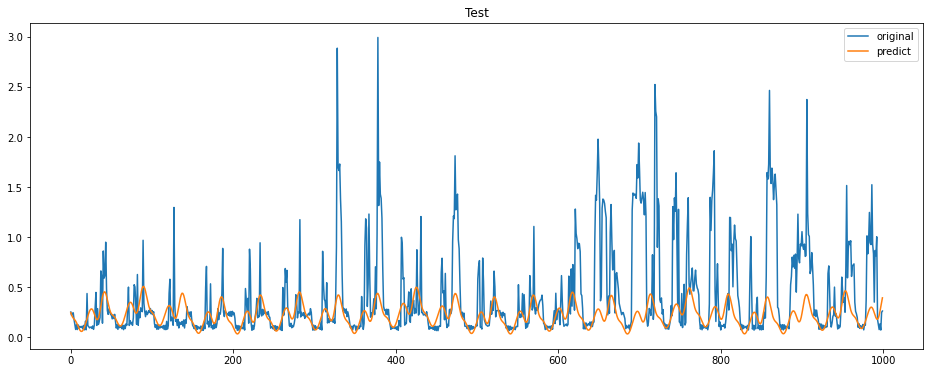

In [66]:
plt.figure(figsize=(16,6))
plt.title("Test")
plt.plot(df['y'][6000:7000].values, label="original")
plt.plot(forecast['yhat'].values, label="predict")
plt.legend()
print("RMSE: ", ((forecast['yhat'] - df['y'][6000:7000].values) ** 2).mean() ** .5)

# Прогнозирование и склейка прогноза из нескольких

In [7]:
def make_prediction(df, quantity=10, step=5, train_length=200, predict_length=50, start = 0):
    #Prophet не дообучается, поэтому каждую итерацию сохдаётся новая модель
    predictions = []
    for i in range(quantity):
        train_df = df[start + i*step:start + train_length + i*step]
        m = Prophet()
        m.add_seasonality('s1', period=1, fourier_order=38)
        m.add_seasonality('s2', period=2, fourier_order=38)
        m.add_seasonality('s3', period=3, fourier_order=38)
        m.add_seasonality('s4', period=4, fourier_order=38)
        m.fit(train_df)
        future = m.make_future_dataframe(periods=predict_length, freq='30min', include_history=False)
        forecast = m.predict(future)
        predictions.append(forecast['yhat'])
    return predictions
        
def merge_predictions(predictions, quantity=10, step=5, train_length=200, predict_length=50, start = 0):
    result = np.zeros((predict_length + step * (quantity - 1)))
    result[:predict_length] += predictions[0].values
    for i in range(1, quantity):
        result[i*step:predict_length] += predictions[i][:-i*step].values
        result[predict_length:predict_length + i*step ] += predictions[i][-i*step:].values
    result[(quantity - 1)*step:predict_length] /= quantity
    for i in range(1, quantity-1):
        result[i*step:i*step + step]/=(i + 1)
        result[predict_length + (i-1)*step: predict_length + (i-1)*step + step]/=quantity-i
    return result

In [98]:
predictions = make_prediction(df, quantity=5, step=100, train_length=3000, predict_length=1000, start = 0)
merged_prediction = merge_predictions(predictions, quantity=5, step=100, train_length=3000, predict_length=1000, start = 0)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


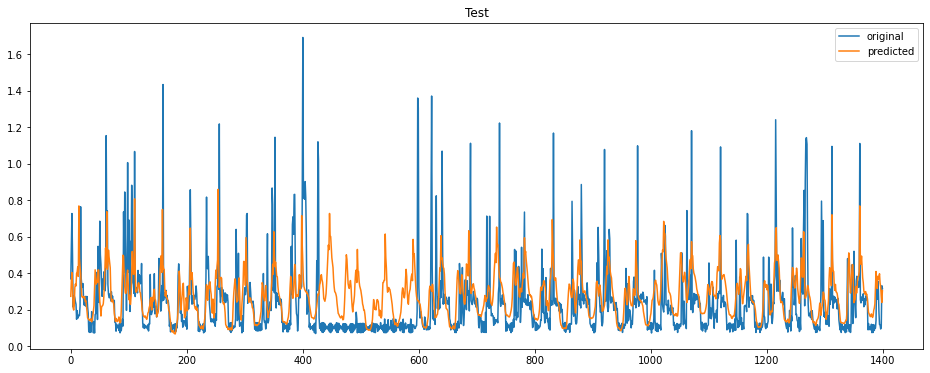

In [142]:
plt.figure(figsize=(16,6))
plt.title("Test")
plt.plot(df[3000:3000+len(merged_prediction)]['y'].values, label="original")
plt.plot(merged_prediction, label="predicted")
plt.legend()

### Сравнение одного предсказания со скленным

In [97]:
train_df = df[0:3000]
m = Prophet()
m.add_seasonality('s1', period=1, fourier_order=38)
m.add_seasonality('s2', period=2, fourier_order=38)
m.add_seasonality('s3', period=3, fourier_order=38)
m.add_seasonality('s4', period=4, fourier_order=38)
m.fit(train_df)
future = m.make_future_dataframe(periods=1000, freq='30min', include_history=False)
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


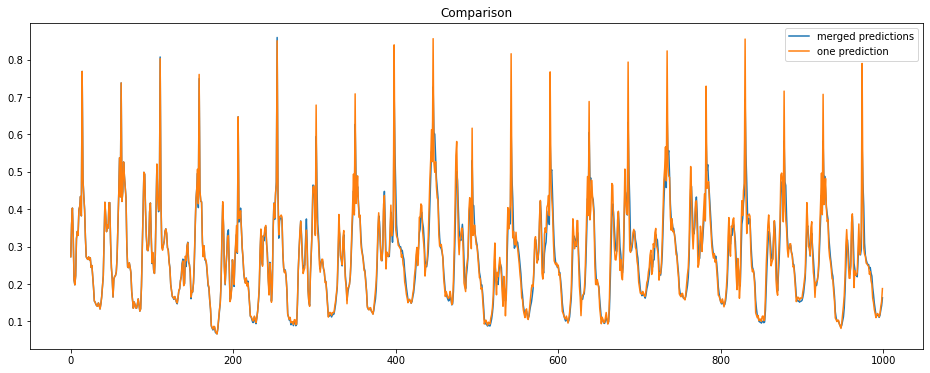

In [87]:
plt.figure(figsize=(16,6))
plt.title("Comparison")
plt.plot(merged_prediction[:1000], label="merged predictions")
plt.plot(forecast['yhat'].values, label="one prediction")
plt.legend()

# Спектр и распределение остатков

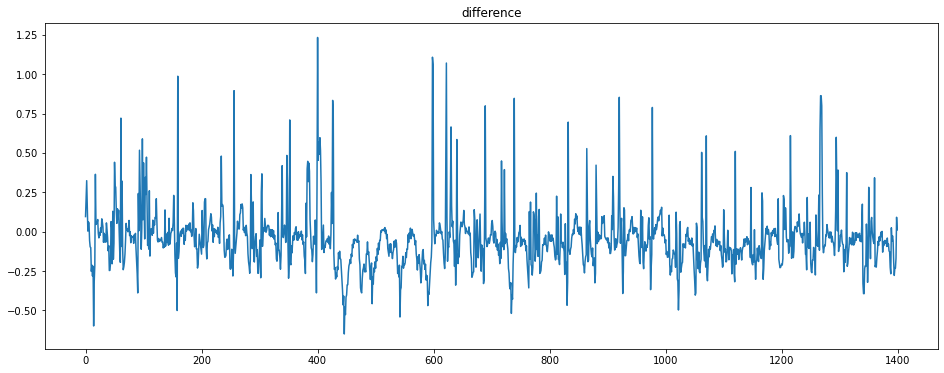

In [103]:
diff = df['y'][3000:4400].values - merged_prediction
plt.figure(figsize=(16,6))
plt.title("difference")
plt.plot(diff)

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


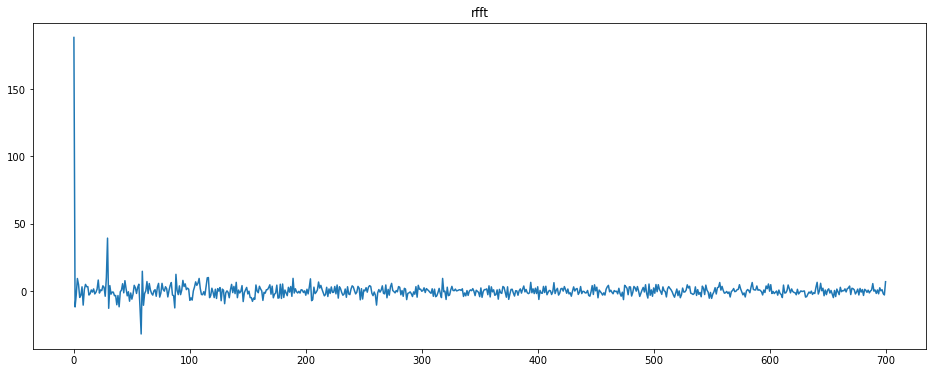

In [104]:
plt.figure(figsize=(16,6))
plt.title("rfft")
diff_rfft = np.fft.rfft(abs(diff))
plt.plot(diff_rfft)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


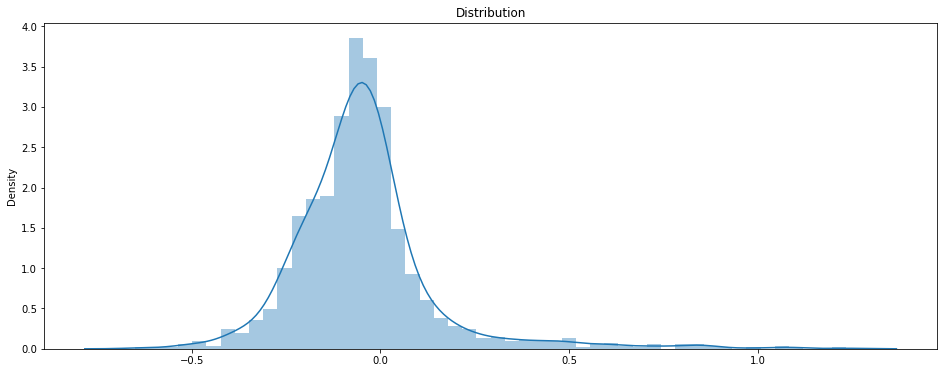

In [105]:
plt.figure(figsize=(16,6))
plt.title("Distribution")
sns_plot = sns.distplot(diff)
fig = sns_plot.get_figure()

# Генерация синтетики + шум

In [9]:
def make_noise(train_df, size=0.95):
    X = train_df['y'].values
    Y = np.random.normal(X, size)
    return Y

def mean_confidence_interval(data, confidence=0.96):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return (m-h, m+h)

In [107]:
predicted_lst = []
cdf = df[:5000].copy()
for i in range(100):
    print(i)
    ndf = cdf.copy()
    ndf['y'] = make_noise(cdf, 1.5)
    predictions = make_prediction(df, quantity=5, step=100, train_length=3000, predict_length=1000, start = 0)
    merged_prediction = merge_predictions(predictions, quantity=5, step=100, train_length=3000, predict_length=1000, start = 0)
    predicted_lst.append(merged_prediction)

In [8]:
#уже подсчитанные 100 прогнозов
with open('predicted_list2.pickle', 'rb') as f:
     predicted_lst = pickle.load(f)

In [11]:
pred_lst_arr = np.array(predicted_lst)
mean_ts = []
var_ts = []
for i in range(pred_lst_arr.shape[1]):
    mean_ts.append(pred_lst_arr[:,i].mean())
    var_ts.append(pred_lst_arr[:,i].var())
mean_ts = np.array(mean_ts)
var_ts = np.array(var_ts)

mhp_lst = []
mhm_lst = []

for i in range(pred_lst_arr.shape[1]):
    a = pred_lst_arr[:,i]
    interval = mean_confidence_interval(a)
    mhm_lst.append(-1.96*a.var())
    mhp_lst.append(1.96*a.var())

mhp_lst = mean_ts+np.array(mhp_lst)
mhm_lst = mean_ts+np.array(mhm_lst)

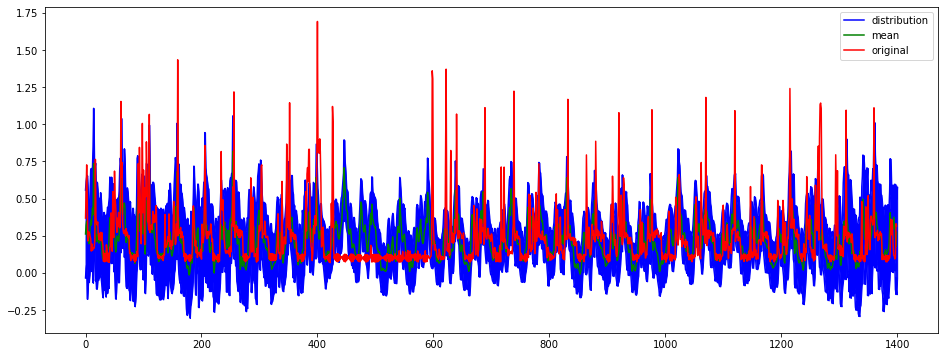

In [12]:
plt.figure(figsize=(16,6))
plt.plot(mhp_lst, color='b', label = 'distribution')
plt.plot(mhm_lst, color='b')
x = np.linspace(0, pred_lst_arr.shape[1], pred_lst_arr.shape[1])
plt.fill_between(x, mhm_lst, mhp_lst, color='b')
plt.plot(mean_ts, color='g', label = 'mean')
plt.plot(df[3000:4400]['y'].values, color='r', label = 'original')
plt.legend()

# Сравнение спектра синтетики и исходного ряда

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


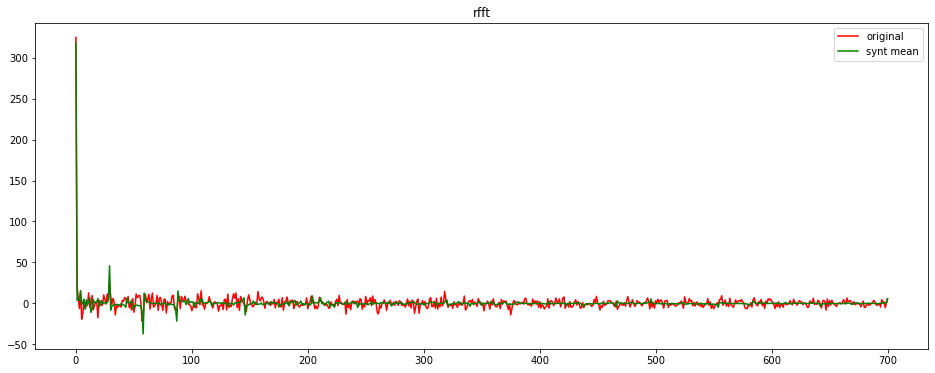

In [19]:
plt.figure(figsize=(16,6))
plt.title("rfft")
rfft_1 = np.fft.rfft(abs(mean_ts))
rfft_2 = np.fft.rfft(abs(df[3000:4400]['y'].values))
plt.plot(rfft_2, label = "original", c='r')
plt.plot(rfft_1, label = "synt mean", c='g')
plt.legend()

 # Сравнение распределений

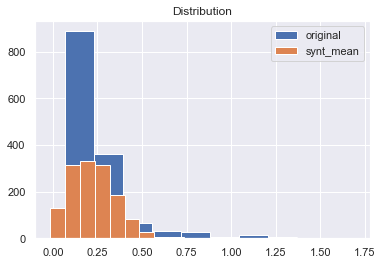

In [82]:
sns.set()
plt.title("Distribution")
plt.hist(df[3000:4400]['y'].values, label = "original")
plt.hist(mean_ts, label = "synt_mean")
plt.legend()

 # Оценка по RMSE, спектру и распределению (длинна входного ряда vs. длина прогноза)

### Длина входного ряда - 2880 (2 месяца), длина прогноза - 17483 (год)

In [116]:
input_len = 2880
forecasting_len = 17483
predictions = make_prediction(df, quantity=5, step=100, train_length=input_len, predict_length=forecasting_len, start = 0)
merged_prediction = merge_predictions(predictions, quantity=5, step=100, train_length=input_len, predict_length=forecasting_len, start = 0)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


RMSE:  0.4509035776768784


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


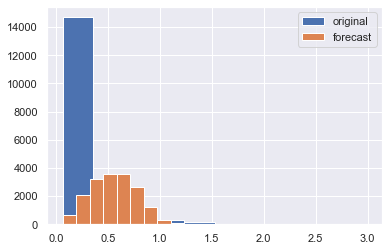

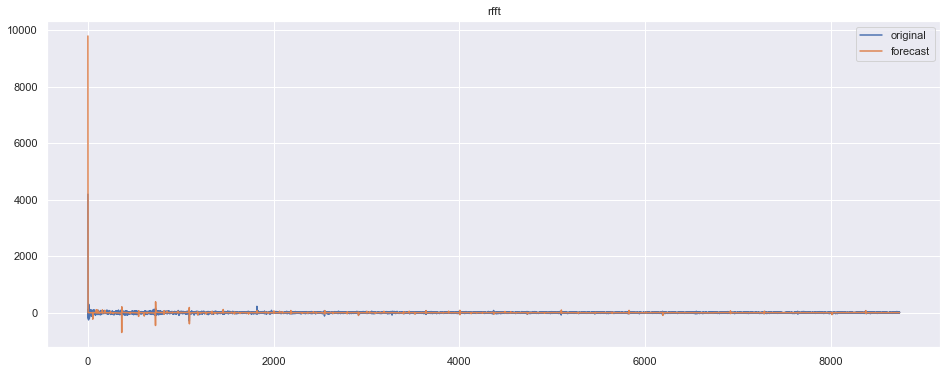

In [118]:
original = df[input_len:input_len + forecasting_len]['y'].values
forecast = merged_prediction[:forecasting_len]
rfft_1 = np.fft.rfft(abs(original))
rfft_2 = np.fft.rfft(abs(forecast))
print("RMSE: ", ((original - forecast) ** 2).mean() ** .5)
plt.hist(original, label = "original")
plt.hist(forecast, label = "forecast")
plt.legend()

plt.figure(figsize=(16,6))
plt.title("rfft")
plt.plot(rfft_1, label = "original")
plt.plot(rfft_2, label = "forecast")
plt.legend()

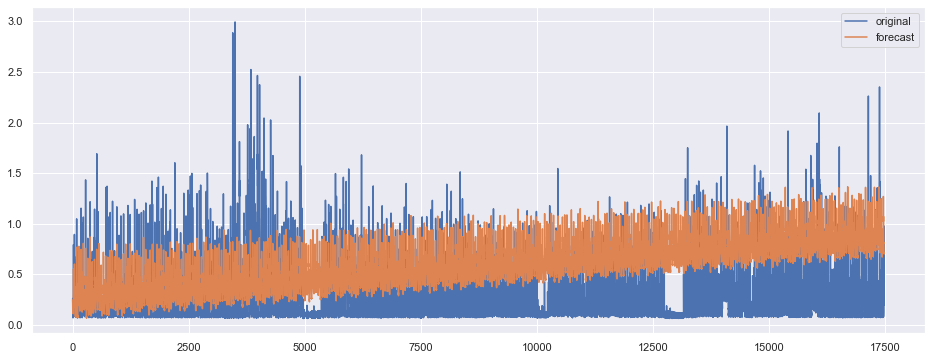

In [134]:
plt.figure(figsize=(16,6))
plt.plot(original, label = "original")
plt.plot(forecast, label = "forecast")
plt.legend()

### Длина входного ряда - 4370 (3 месяца), длина прогноза - 17483 (год)

In [135]:
input_len = 4370
forecasting_len = 17483
predictions = make_prediction(df, quantity=5, step=100, train_length=input_len, predict_length=forecasting_len, start = 0)
merged_prediction = merge_predictions(predictions, quantity=5, step=100, train_length=input_len, predict_length=forecasting_len, start = 0)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


RMSE:  0.3065468661488341


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


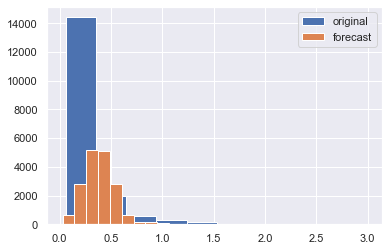

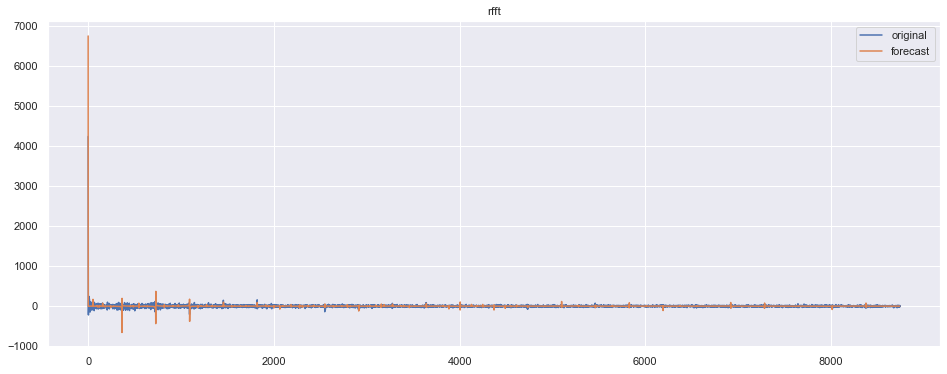

In [137]:
original = df[input_len:input_len + forecasting_len]['y'].values
forecast = merged_prediction[:forecasting_len]
rfft_1 = np.fft.rfft(abs(original))
rfft_2 = np.fft.rfft(abs(forecast))
print("RMSE: ", ((original - forecast) ** 2).mean() ** .5)
plt.hist(original, label = "original")
plt.hist(forecast, label = "forecast")
plt.legend()

plt.figure(figsize=(16,6))
plt.title("rfft")
plt.plot(rfft_1, label = "original")
plt.plot(rfft_2, label = "forecast")
plt.legend()

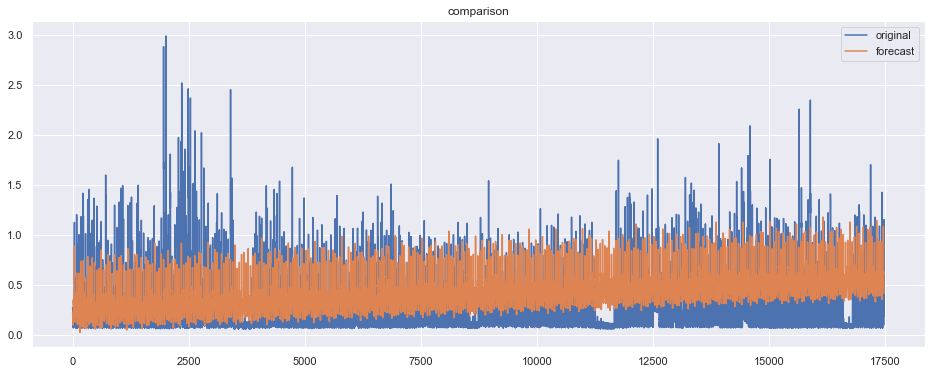

In [139]:
plt.figure(figsize=(16,6))
plt.title("comparison")
plt.plot(original, label = "original")
plt.plot(forecast, label = "forecast")
plt.legend()

### Длина входного ряда - 5907 (4 месяца), длина прогноза - 17483 (год)

In [173]:
input_len = 5907
forecasting_len = 17483
predictions = make_prediction(df, quantity=5, step=100, train_length=input_len, predict_length=forecasting_len, start = 0)
merged_prediction = merge_predictions(predictions, quantity=5, step=100, train_length=input_len, predict_length=forecasting_len, start = 0)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


RMSE:  0.26740150760351383


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


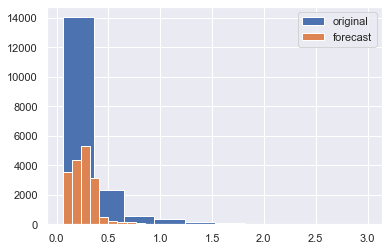

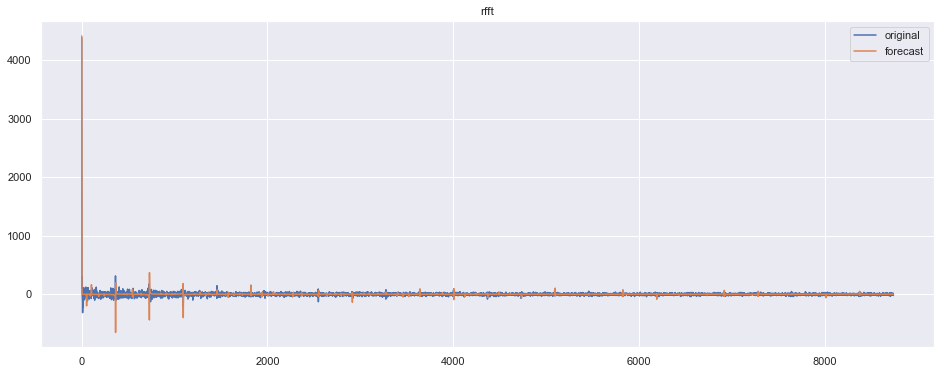

In [174]:
original = df[input_len:input_len + forecasting_len]['y'].values
forecast = merged_prediction[:forecasting_len]
rfft_1 = np.fft.rfft(abs(original))
rfft_2 = np.fft.rfft(abs(forecast))
print("RMSE: ", ((original - forecast) ** 2).mean() ** .5)
plt.hist(original, label = "original")
plt.hist(forecast, label = "forecast")
plt.legend()

plt.figure(figsize=(16,6))
plt.title("rfft")
plt.plot(rfft_1, label = "original")
plt.plot(rfft_2, label = "forecast")
plt.legend()

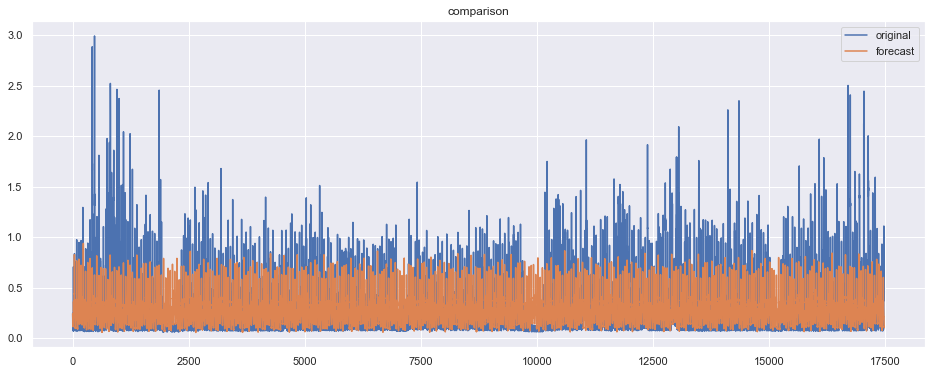

In [175]:
plt.figure(figsize=(16,6))
plt.title("comparison")
plt.plot(original, label = "original")
plt.plot(forecast, label = "forecast")
plt.legend()